# Vektor-Kompression

## Grundlagen 

Wir betrachten im Folgenden einen Prozess $\cal X$ mit der Ereignismenge $\mathbb{X}$. Die Ereignisse treten mit den Wahrscheinlichkeiten $\Pr \{ X_{\mu} \}$ auf. Der Prozess erzeugt zu den Zeitpunkten $i T_{\mathrm{s}}$ statistisch unabhängige Symbole $x[i]$. 

Anstatt jedes Symbol eines Zufallsprozesses einzeln zu komprimieren (Single Letter Compression), kann man auch Tupel von mehreren Symbolen bilden und diese gemeinsam codieren. Diesen Prozess nennt man Vektor-Kompression. Ein Tupel bzw. Vektor

\begin{equation}
    \mathbf{x}[k] = \big[ x[kn] \ \cdots \ x[(k+1)n-1] \big] \; ,
\end{equation}

der Länge $n$ kann "Werte" aus der Menge ${\mathbb{X}}^n$ annehmen. Aufgrund der statistischen Unabhängigkeit der Symbole lauten die Auftrittswahrscheinlichkeiten der Tupel

\begin{equation}
   \Pr \{ \mathbf{x}[k] \} = \prod_{i=0}^{n-1} \Pr \{ {\cal X} = x[kn+i] \} \; .
\end{equation}

Somit addieren sich auch die symbolweisen Entropien zur vektorweisen Entropie und es gilt

\begin{align}
   H(\underline{\cal X})
    &= - \sum_{\mathbf{x} \in \mathbb{X}^n} \Pr \{ \underline{\cal X}=\mathbf{x} \} \cdot \log_2 \Pr \{ \underline{\cal X}=\mathbf{x} \} \\
    &= - \sum_{x_0 \in \mathbb{X}}  \cdots \sum_{x_{n-1} \in \mathbb{X}} \prod_{i=0}^{n-1} \Pr \{ {\cal X}=x_i \} \cdot \sum_{i=0}^{n-1} \log_2 \Pr \{ {\cal X}=x_i \} \\
    &= - \sum_{i=0}^{n-1} \sum_{x_i \in \mathbb{X}}  \Pr \{ {\cal X}=x_i \} \cdot \log_2 \Pr \{ {\cal X}=x_i \} \\
    &= \sum_{i=0}^{n-1} H({\cal X}) = n H({\cal X})
\end{align}

Für eine einzelne Zufallsvariable gilt folglich

\begin{align}
   H({\cal X}) 
   &= \frac{H(\underline{\cal X})}{n} \; .
\end{align}

Im Folgenden der Einfluss der Vektorisierung auf die Huffman-Codierung untersucht.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappush, heappop, heapify

def encode(symb2freq):
    """Huffman encoder given a dictionary with symbols and probabilities"""
    heap = [[wt, [sym, ""]] for sym, wt in symb2freq.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))


def average_wordlength(code,prob):
    """computes average word length of code given the codeword and their probabilities
        order of codewords and probabilities might differ due to Huffman coding !!!
    """
    averagewordlength = 0.0
    for p in code:
        averagewordlength += len(p[1]) * prob[p[0]]

    return averagewordlength


## Statistik des Prozesses und Berechnung der Entropie

In [2]:
# Definition der Wahrscheinlichkeiten
Pr = np.array([0.1, 0.2, 0.3, 0.4])
#Pr = np.array([0.4, 0.3, 0.3])

# Berechnung der symbolweisen Information
H_Xi = - np.log2(Pr)
print("Die symbolweise Information der Ereignisse lauten",H_Xi,"bit. \n")

# Berechnung der Entropie
H_X = np.inner(Pr,H_Xi)
print("Die Entropie des Zufallsprozesses beträgt %g bit.\n" % (H_X))

Die symbolweise Information der Ereignisse lauten [3.32192809 2.32192809 1.73696559 1.32192809] bit. 

Die Entropie des Zufallsprozesses beträgt 1.84644 bit.



## Statistik der Vektoren / Tupel unterschiedlicher Länge

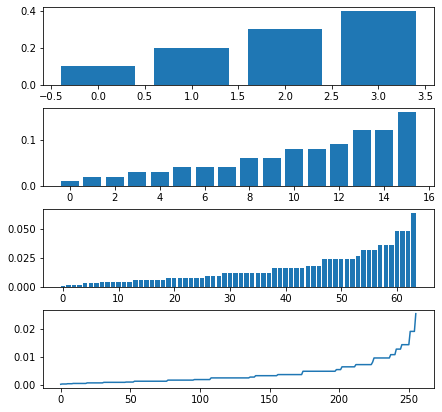

In [16]:
# Betrachtung von Zweier-Tupeln
Pr2 = np.outer(Pr,Pr).reshape(Pr.shape[0]**2,1)
Pr2 = np.sort(Pr2[:,0])

# Betrachtung von Dreier-Tupeln
Pr3 = np.outer(Pr2,Pr).reshape(Pr2.shape[0]*Pr.shape[0],1)
Pr3 = np.sort(Pr3[:,0])

# Betrachtung von Vierer-Tupeln
Pr4 = np.outer(Pr2,Pr2).reshape(Pr2.shape[0]**2,1)
Pr4 = np.sort(Pr4[:,0])

# Betrachtung von Fünfer-Tupeln
Pr5 = np.outer(Pr4,Pr).reshape(Pr4.shape[0]*Pr.shape[0],1)
Pr5 = np.sort(Pr5[:,0])

# Betrachtung von Sechser-Tupeln
Pr6 = np.outer(Pr3,Pr3).reshape(Pr3.shape[0]**2,1)
Pr6 = np.sort(Pr6[:,0])

# Betrachtung von Siebener-Tupeln
Pr7 = np.outer(Pr6,Pr).reshape(Pr6.shape[0]*Pr.shape[0],1)
Pr7 = np.sort(Pr7[:,0])

# Betrachtung von Achter-Tupeln
Pr8 = np.outer(Pr4,Pr4).reshape(Pr4.shape[0]**2,1)
Pr8 = np.sort(Pr8[:,0])

fig1 = plt.figure(figsize=(7,7))
plt.subplots_adjust(hspace=0.3)

ax1a = fig1.add_subplot(411)
ax1a.bar(np.arange(Pr.shape[0]),Pr,width=0.8)

ax1b = fig1.add_subplot(412)
ax1b.bar(np.arange(Pr2.shape[0]),Pr2,width=0.8)

ax1c = fig1.add_subplot(413)
ax1c.bar(np.arange(Pr3.shape[0]),Pr3,width=0.8)

ax1d = fig1.add_subplot(414)
ax1d.plot(np.arange(Pr4.shape[0]),Pr4)


## Huffman-Codierung für verschiedene Vektorlängen

In [4]:
averageLengthHuffmanCode = np.zeros(8)

# Generiere Dictionary mit Symbolen und ihren Auftrittswahrscheinlichkeiten
symbol_count1 = {a:b for a,b in zip(np.arange(len(Pr)),Pr)}
# Rufe Routine für Huffman-Codierung auf
huff1 = encode(symbol_count1)
averageLengthHuffmanCode[0] = average_wordlength(huff1,symbol_count1)
print("Die mittlere Wortlänge des Huffman-Codes beträgt %g bit pro Symbol.\n" % (averageLengthHuffmanCode[0]))


# Generiere Dictionary  mit Zweiertupeln und ihren Auftrittswahrscheinlichkeiten
symbol_count2 = {a:b for a,b in zip(np.arange(len(Pr2)),Pr2)}
# Rufe Routine für Huffman-Codierung auf
huff2 = encode(symbol_count2)
averageLengthHuffmanCode[1] = average_wordlength(huff2,symbol_count2) / 2
print("Die mittlere Wortlänge des Huffman-Codes für Zweiertupel beträgt %g bit pro Symbol.\n" % (averageLengthHuffmanCode[1]))


# Generiere Dictionary  mit Dreiertupeln und ihren Auftrittswahrscheinlichkeiten
symbol_count3 = {a:b for a,b in zip(np.arange(len(Pr3)),Pr3)}
# Rufe Routine für Huffman-Codierung auf
huff3 = encode(symbol_count3)
averageLengthHuffmanCode[2] = average_wordlength(huff3,symbol_count3) / 3
print("Die mittlere Wortlänge des Huffman-Codes für Dreiertupel beträgt %g bit pro Symbol.\n" % (averageLengthHuffmanCode[2]))


# Generiere Liste mit Vierertupeln und ihren Auftrittswahrscheinlichkeiten
symbol_count4 = {a:b for a,b in zip(np.arange(len(Pr4)),Pr4)}
# Rufe Routine für Huffman-Codierung auf
huff4 = encode(symbol_count4)
averageLengthHuffmanCode[3] = average_wordlength(huff4,symbol_count4) / 4
print("Die mittlere Wortlänge des Huffman-Codes für Vierertupel beträgt %g bit pro Symbol.\n" % (averageLengthHuffmanCode[3]))


# Generiere Dictionary  mit Fünfertupeln und ihren Auftrittswahrscheinlichkeiten
symbol_count5 = {a:b for a,b in zip(np.arange(len(Pr5)),Pr5)}
# Rufe Routine für Huffman-Codierung auf
huff5 = encode(symbol_count5)
averageLengthHuffmanCode[4] = average_wordlength(huff5,symbol_count5) / 5
print("Die mittlere Wortlänge des Huffman-Codes für Fünfertupel beträgt %g bit pro Symbol.\n" % (averageLengthHuffmanCode[4]))


# Generiere Dictionary  mit Sechsertupeln und ihren Auftrittswahrscheinlichkeiten
symbol_count6 = {a:b for a,b in zip(np.arange(len(Pr6)),Pr6)}
# Rufe Routine für Huffman-Codierung auf
huff6 = encode(symbol_count6)
averageLengthHuffmanCode[5] = average_wordlength(huff6,symbol_count6) / 6
print("Die mittlere Wortlänge des Huffman-Codes für Sechsertupel beträgt %g bit pro Symbol.\n" % (averageLengthHuffmanCode[5]))


# Generiere Dictionary  mit Siebenertupeln und ihren Auftrittswahrscheinlichkeiten
symbol_count7 = {a:b for a,b in zip(np.arange(len(Pr7)),Pr7)}
# Rufe Routine für Huffman-Codierung auf
huff7 = encode(symbol_count7)
averageLengthHuffmanCode[6] = average_wordlength(huff7,symbol_count7) / 7
print("Die mittlere Wortlänge des Huffman-Codes für Siebenertupel beträgt %g bit pro Symbol.\n" % (averageLengthHuffmanCode[6]))


# Generiere Liste mit Achtertupeln und ihren Auftrittswahrscheinlichkeiten
symbol_count8 = {a:b for a,b in zip(np.arange(len(Pr8)),Pr8)}
# Rufe Routine für Huffman-Codierung auf
huff8 = encode(symbol_count8)
averageLengthHuffmanCode[7] = average_wordlength(huff8,symbol_count8) / 8
print("Die mittlere Wortlänge des Huffman-Codes für Achtertupel beträgt %g bit pro Symbol.\n" % (averageLengthHuffmanCode[7]))


Die mittlere Wortlänge des Huffman-Codes beträgt 1.9 bit pro Symbol.

Die mittlere Wortlänge des Huffman-Codes für Zweiertupel beträgt 1.865 bit pro Symbol.

Die mittlere Wortlänge des Huffman-Codes für Dreiertupel beträgt 1.859 bit pro Symbol.

Die mittlere Wortlänge des Huffman-Codes für Vierertupel beträgt 1.85323 bit pro Symbol.

Die mittlere Wortlänge des Huffman-Codes für Fünfertupel beträgt 1.85347 bit pro Symbol.

Die mittlere Wortlänge des Huffman-Codes für Sechsertupel beträgt 1.85143 bit pro Symbol.

Die mittlere Wortlänge des Huffman-Codes für Siebenertupel beträgt 1.85111 bit pro Symbol.

Die mittlere Wortlänge des Huffman-Codes für Achtertupel beträgt 1.85065 bit pro Symbol.



## Berechnung der Redundanz

Text(0.5, 1.0, 'Redundanz in %')

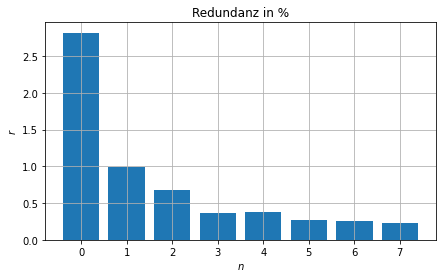

In [5]:
redundancy = (averageLengthHuffmanCode - H_X) / averageLengthHuffmanCode

fig2 = plt.figure(figsize=(7,4))
ax2 = fig2.add_subplot(111)
ax2.bar(np.arange(len(redundancy)),redundancy*100,width=0.8)
plt.xlabel('$n$')
plt.ylabel('$r$')
plt.grid()
plt.title('Redundanz in %')

Dem obigen Bild ist deutlich zu entnehmen, dass die Effizienz der Huffman-Codierung durch die Vektorbildung zunimmt, die nach der Kompression verbleibende Redundanz wird immer kleiner. Allerdings ist kein monotoner Abfall zu beobachten, da für $n=4$ ein kleiner Anstieg gegenüber $n=3$ zu beobachten ist.

In [6]:
# Drucke Ergebnis
print("Symbol\tGewicht\tHuffman Code")
code_len = np.zeros(len(symbol_count2))
cntr = 0
for p in huff2:
    print("%s\t%4.2f\t%s" % (p[0], symbol_count2[p[0]], p[1]))
    code_len[cntr] = len(p[1])
    cntr +=1

Symbol	Gewicht	Huffman Code
12	0.09	000
13	0.12	011
14	0.12	100
15	0.16	111
7	0.04	0010
8	0.06	0100
9	0.06	0101
10	0.08	1100
11	0.08	1101
2	0.02	00110
3	0.03	00111
4	0.03	10100
5	0.04	10110
6	0.04	10111
0	0.01	101010
1	0.02	101011
